# XGBoost Basis

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report

### Test alt - bitte nicht durchlaufen lassen, erst ab nächster Überschrift

In [2]:
# 📥 1. Daten einlesen
train = pd.read_csv("Data/preprocessed/train_preprocessed.csv")         # Trainingsdaten mit Zielspalte
test = pd.read_csv("Data/preprocessed/test_preprocessed.csv")        # Testdaten ohne Zielspalte
target = pd.read_csv("Data/preprocessed/test_target.csv")  # Testzielwerte mit AdoptionSpeed + PetID

# 🧹 2. Features & Ziel trennen
X_train = train.drop(columns=["AdoptionSpeed", "PetID"])
y_train = train["AdoptionSpeed"]

X_test = test.drop(columns=["PetID"])
y_test = target["AdoptionSpeed"]  # Zielwerte für Test (optional)

# 🧠 3. XGBoost-Modell mit Defaultparametern + reproduzierbarem Seed
model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=5,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# 🚀 4. Training
model.fit(X_train, y_train)

# 🔍 5. Vorhersage auf Testdaten
y_pred = model.predict(X_test)

# 📊 6. Evaluation (falls Zielwerte vorhanden)
print(classification_report(y_test, y_pred))

# 🧾 7. Ergebnis zusammenführen (optional)
result_df = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed_Pred": y_pred,
    "AdoptionSpeed_True": y_test.values
})

# 💾 8. Optional: Submission speichern
submission = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed": y_pred
})
submission.to_csv("submission.csv", index=False)


c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.52      0.51      0.51       684
           1       0.32      0.30      0.31       448
           2       0.33      0.33      0.33       628
           3       0.34      0.25      0.29       464
           4       0.46      0.57      0.51       621

    accuracy                           0.41      2845
   macro avg       0.39      0.39      0.39      2845
weighted avg       0.40      0.41      0.40      2845



In [3]:
print(y_test.value_counts())


0    684
2    628
4    621
3    464
1    448
Name: AdoptionSpeed, dtype: int64


In [4]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PetID          2845 non-null   object
 1   AdoptionSpeed  2845 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.6+ KB


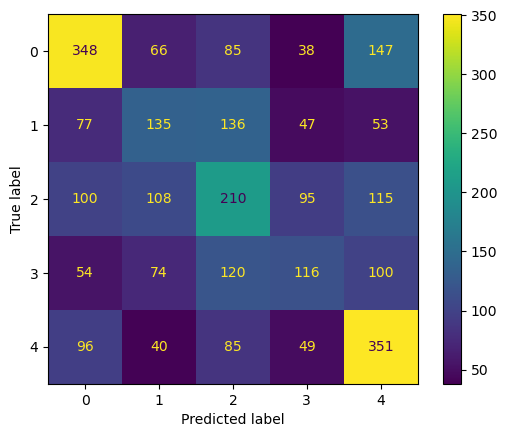

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])

# Anzeige
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
#

In [14]:
print(y_train.value_counts())


4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64


### Test mit neuem df

Dummy Accuracy: 0.24042179261862917

Dummy Classification Report:
               precision    recall  f1-score   support

           0       0.24      1.00      0.39       684
           1       0.00      0.00      0.00      1540
           2       0.00      0.00      0.00       621

    accuracy                           0.24      2845
   macro avg       0.08      0.33      0.13      2845
weighted avg       0.06      0.24      0.09      2845

[0]	validation_0-mlogloss:1.06097
[1]	validation_0-mlogloss:1.03666
[2]	validation_0-mlogloss:1.01757
[3]	validation_0-mlogloss:1.00412
[4]	validation_0-mlogloss:0.99193


c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\trai

[5]	validation_0-mlogloss:0.98122
[6]	validation_0-mlogloss:0.97419
[7]	validation_0-mlogloss:0.96665
[8]	validation_0-mlogloss:0.95924
[9]	validation_0-mlogloss:0.94882
[10]	validation_0-mlogloss:0.94162
[11]	validation_0-mlogloss:0.94032
[12]	validation_0-mlogloss:0.93795
[13]	validation_0-mlogloss:0.93498
[14]	validation_0-mlogloss:0.93474
[15]	validation_0-mlogloss:0.93455
[16]	validation_0-mlogloss:0.92957
[17]	validation_0-mlogloss:0.92783
[18]	validation_0-mlogloss:0.92619
[19]	validation_0-mlogloss:0.92153
[20]	validation_0-mlogloss:0.92080
[21]	validation_0-mlogloss:0.91793
[22]	validation_0-mlogloss:0.91807
[23]	validation_0-mlogloss:0.92043
[24]	validation_0-mlogloss:0.92003
[25]	validation_0-mlogloss:0.91866
[26]	validation_0-mlogloss:0.92153
[27]	validation_0-mlogloss:0.92128
[28]	validation_0-mlogloss:0.91998
[29]	validation_0-mlogloss:0.91893
[30]	validation_0-mlogloss:0.92050
[31]	validation_0-mlogloss:0.91786
[32]	validation_0-mlogloss:0.91581
[33]	validation_0-mloglos

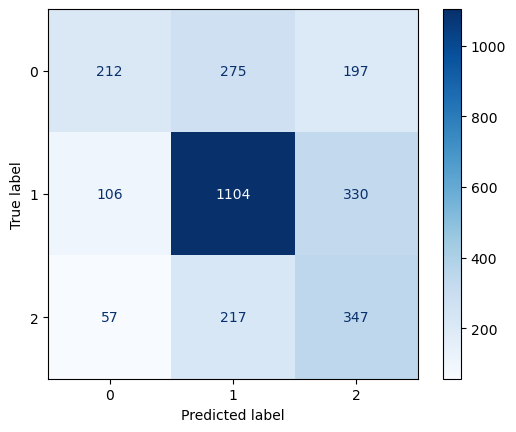

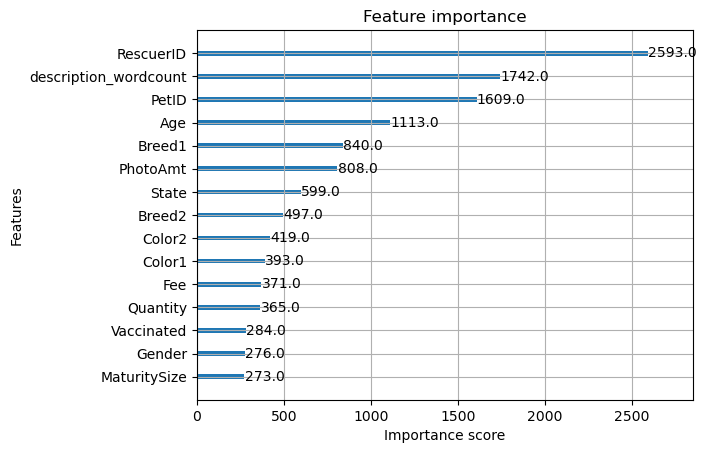

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

train_df = pd.read_csv("Data/preprocessed/train_preprocessed.csv")

# --- 1. Features & Ziel ---
# Angenommen du hast: train_df, valid_df, test_df
X_train = train_df.drop(columns=['AdoptionSpeed'])
y_train = train_df['AdoptionSpeed']

X_valid = pd.read_csv("Data/preprocessed/valid_preprocessed.csv")
y_valid = pd.read_csv("Data/preprocessed/valid_target.csv")['AdoptionSpeed']

X_test = pd.read_csv("Data/preprocessed/test_preprocessed.csv")
y_test = pd.read_csv("Data/preprocessed/test_target.csv")['AdoptionSpeed']

from sklearn.preprocessing import OrdinalEncoder

# Kategorische Spalten ermitteln
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Encoder erstellen
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit auf Trainingsdaten
X_train[cat_cols] = oe.fit_transform(X_train[cat_cols])
X_valid[cat_cols] = oe.transform(X_valid[cat_cols])
X_test[cat_cols] = oe.transform(X_test[cat_cols])


# --- 2. Label Encoding für alle kategorischen Spalten ---
for col in X_train.select_dtypes(include=['category', 'object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    
    # Transformiere valid und test mit den gleichen Encodern
    X_valid[col] = le.transform(X_valid[col])
    X_test[col] = le.transform(X_test[col])

# --- 3. XGBoost Modell ---
xgb = XGBClassifier(
    objective="multi:softmax",
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)
xgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

# --- 4. Vorhersagen auf Testset ---
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 5. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap="Blues")


### Test mit Oversampling

Train classes: [0 1 2]
Valid classes: [0 1 2]
Test classes: [0 1 2]
Dummy Accuracy: 0.2312829525483304

Dummy Classification Report:
               precision    recall  f1-score   support

           0       0.23      1.00      0.38       658
           1       0.00      0.00      0.00      1558
           2       0.00      0.00      0.00       629

    accuracy                           0.23      2845
   macro avg       0.08      0.33      0.13      2845
weighted avg       0.05      0.23      0.09      2845

[0]	validation_0-mlogloss:1.06519
[1]	validation_0-mlogloss:1.04356
[2]	validation_0-mlogloss:1.02931
[3]	validation_0-mlogloss:1.02131
[4]	validation_0-mlogloss:1.01366
[5]	validation_0-mlogloss:1.00671
[6]	validation_0-mlogloss:1.00367
[7]	validation_0-mlogloss:1.00087


c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\trai

[8]	validation_0-mlogloss:0.99660
[9]	validation_0-mlogloss:0.99419
[10]	validation_0-mlogloss:0.99235
[11]	validation_0-mlogloss:0.98973
[12]	validation_0-mlogloss:0.98880
[13]	validation_0-mlogloss:0.98651
[14]	validation_0-mlogloss:0.98431
[15]	validation_0-mlogloss:0.98439
[16]	validation_0-mlogloss:0.98311
[17]	validation_0-mlogloss:0.98142
[18]	validation_0-mlogloss:0.98080
[19]	validation_0-mlogloss:0.97929
[20]	validation_0-mlogloss:0.97829
[21]	validation_0-mlogloss:0.97713
[22]	validation_0-mlogloss:0.97710
[23]	validation_0-mlogloss:0.97579
[24]	validation_0-mlogloss:0.97476
[25]	validation_0-mlogloss:0.97505
[26]	validation_0-mlogloss:0.97308
[27]	validation_0-mlogloss:0.97284
[28]	validation_0-mlogloss:0.97256
[29]	validation_0-mlogloss:0.97213
[30]	validation_0-mlogloss:0.97164
[31]	validation_0-mlogloss:0.97000
[32]	validation_0-mlogloss:0.97002
[33]	validation_0-mlogloss:0.97025
[34]	validation_0-mlogloss:0.96947
[35]	validation_0-mlogloss:0.96909
[36]	validation_0-mlog

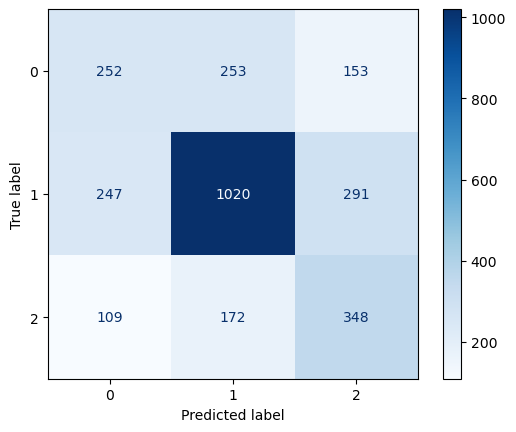

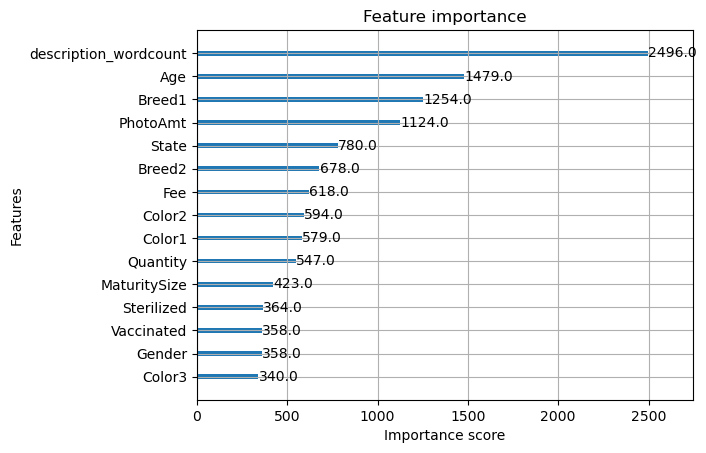

In [10]:
# === 0. Imports ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("Data/preprocessed/combined_preprocessed.csv")

# === 1. Labels von 5 → 3 Klassen mappen ===
def map_labels(x):
    if x == 0:
        return 0   # sehr schnell adoptiert
    elif x == 4:
        return 2   # gar nicht adoptiert
    else:
        return 1   # mittlere Geschwindigkeiten (1,2,3)

df['target'] = df['AdoptionSpeed'].map(map_labels)

# === 2. Features & Labels trennen ===
X = df.drop(columns=['AdoptionSpeed', 'target'])
y = df['target'].astype(int)

# === 3. Stratified Split: Train / Temp ===
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 4. Stratified Split: Temp → Valid / Test ===
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Prüfen: alle Klassen sollten in jedem Set vorkommen
print("Train classes:", np.unique(y_train))
print("Valid classes:", np.unique(y_valid))
print("Test classes:", np.unique(y_test))

# === 5. Kategorische Variablen in Kategorie-Typ umwandeln ===
for df_ in [X_train, X_valid, X_test]:
    for col in df_.select_dtypes(include=["object"]).columns:
        df_[col] = df_[col].astype("category")

# === 6. Oversampling nur auf Train ===
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# === 7. Kategorische Spalten encodieren (OrdinalEncoder) ===
cat_cols = X_train_res.select_dtypes(include=["category"]).columns
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_res[cat_cols] = oe.fit_transform(X_train_res[cat_cols])
X_valid[cat_cols] = oe.transform(X_valid[cat_cols])
X_test[cat_cols]  = oe.transform(X_test[cat_cols])

# === 8. DummyClassifier (Baseline) ===
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_res, y_train_res)
y_dummy = dummy.predict(X_test)
print("Dummy Accuracy:", accuracy_score(y_test, y_dummy))
print("\nDummy Classification Report:\n", classification_report(y_test, y_dummy))

# === 9. XGBoost Modell ===
num_classes = len(np.unique(y_train_res))  # sollte 3 sein

xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=num_classes,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train_res, y_train_res, eval_set=[(X_valid, y_valid)], verbose=True)
y_pred = xgb.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred))

# === 10. Confusion Matrix (alle 3 Klassen) ===
labels_all = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_all)
disp.plot(cmap="Blues")
plt.show()

# === 11. Feature Importance ===
plot_importance(xgb, importance_type="weight", max_num_features=15)
plt.show()
